In [15]:
from task_offloading_moo.pymoo.algorithms.puma_optimizer import PumaOptimizer
from task_offloading_moo.pymoo.problem import TaskOffloadingProblem
from task_offloading_moo.pymoo.operators.repair import TaskOffloadingRepair
from task_offloading_moo.pymoo.operators.sampling import TaskOffloadingSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [16]:
pop_size = 100
n_max_iters = 50

num_cloud_machines = 30
num_fog_machines = 20
num_tasks = 500

algorithm = PumaOptimizer(repair=TaskOffloadingRepair(),
                      use_soft_repair=True,
                      pop_size=pop_size,
                      sampling=TaskOffloadingSampling(),
                      n_max_iters=n_max_iters,
                      archive_size=100,
                      save_history=True,
                      )

problem = TaskOffloadingProblem(num_cloud_machines, num_fog_machines, num_tasks, use_random_machines=True)

In [17]:
res = minimize(problem,
           algorithm,
           seed=1,
           verbose=True)

n_gen  |  n_eval  |     explor    |    exploit    |   is_explore  | n_nds  |      eps      |   indicator  
     1 |      100 |             0 |             0 |            no |      9 |             - |             -
     2 |      101 |  5.365823E+01 |  1.073165E+01 |           yes |     27 |  0.000000E+00 |             f
     3 |      106 |  1.902870E+02 |  4.243710E+01 |           yes |     25 |  0.0012482225 |             f
     4 |      111 |  4.007931E+01 |  4.271778E+01 |            no |     21 |  0.0082083028 |         ideal
     5 |      111 |  4.003413E+01 |  1.897708E+02 |            no |     21 |  0.000000E+00 |             f
     6 |      111 |  4.034862E+01 |  1.376155E-17 |           yes |     21 |  0.000000E+00 |             f
     7 |      114 |  1.234795E+02 |  0.3596652146 |           yes |     19 |  0.0011121140 |             f
     8 |      115 |  5.865900E+01 |  1.0789956439 |           yes |     15 |  0.0035853177 |             f
     9 |      117 |  6.301974E+01 |  

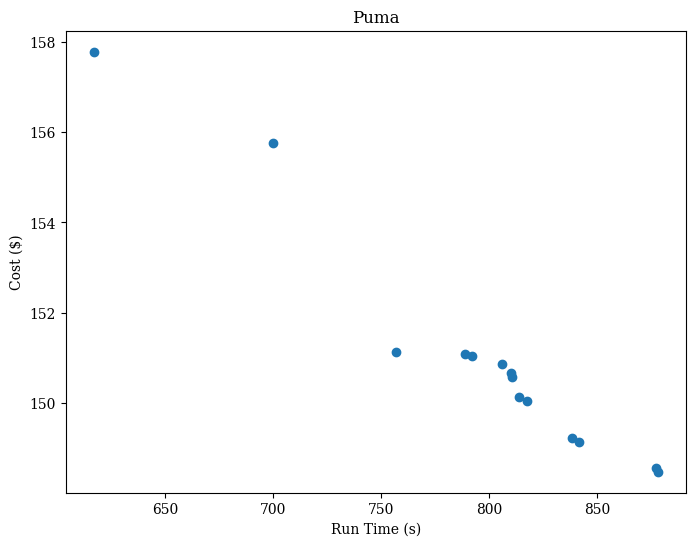

In [18]:
# print(f"Best population found:\n {res.X} \nwith F:\n{res.F}")

plot = Scatter(title="Puma")
plot.add(res.F)
plot.axis_labels = problem.dataset_generator.get_objective_names()
_ = plot.show()

In [19]:
# res.archive.get("F")

In [20]:
import os
from task_offloading_moo.utils.utils import save_generations_video_pymoo

out_path = os.path.join(os.path.dirname(os.getcwd()), "output")
save_generations_video_pymoo(res.history, out_path, "puma_video")


In [21]:
# plot = Scatter(title="Puma")
# plot.add(res.archive.get("F"))
# plot.axis_labels = problem.dataset_generator.get_objective_names()
# _ = plot.show()